In [1]:
import os
import pandas as pd
import numpy as np
import alpaca_trade_api as tradeapi
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()
import pathlib as Path

In [2]:
# storing alpaca key and secret key in variables 
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

api = tradeapi.REST(alpaca_api_key,alpaca_secret_key,api_version='V2')

In [3]:
# set time frame
timeframe = '1D'

# start and 'end' date for covid stock market 
start_date_covid = pd.Timestamp('2020-01-01',tz='America/New_York').isoformat()
end_date_covid = pd.Timestamp('2020-11-20',tz='America/New_York').isoformat()

# start and end date for 2008 recession 
start_date_2008 = pd.Timestamp('2007-07-01',tz='America/New_York').isoformat()
end_date_2008 = pd.Timestamp('2009-07-01',tz='America/New_York').isoformat()

# set tickers (per industry)
energy_tickers = ['XOM','BP','COP','CVX', 'TOT']
# financeind_tickers
# techind_tickers etc

# get stock data from covid
energy_covid_ticker = api.get_barset(energy_tickers,timeframe,start=start_date_covid,end = end_date_covid).df

# get stock data from 2008 recession
energy_ticker2008 = api.get_barset(energy_tickers,timeframe,start=start_date_2008,end = end_date_2008).df

In [7]:
# create new covid and 2008 dataframe to store ckosing prices of each stock

energy_covid_closingprices = pd.DataFrame()

# get closing prices for all tickers
for ticker in energy_tickers:
    energy_covid_closingprices[ticker]=energy_covid_ticker[ticker]['close']
    
# drop time component on index
energy_covid_closingprices.index = energy_covid_closingprices.index.date
    
energy_covid_closingprices.head()

,XOM,BP,COP,CVX,TOT
2020-01-02,70.900,38.14,65.470,121.44,55.28
2020-01-03,70.320,38.84,65.710,121.01,55.47
2020-01-06,70.870,39.85,66.480,120.61,56.53
2020-01-07,70.280,39.44,66.480,119.04,56.19
2020-01-08,69.235,38.83,64.935,117.69,55.85


In [9]:
energy_closingprices2008 = pd.DataFrame()

# get closing prices for all tickers
for ticker in energy_tickers:
    energy_closingprices2008[ticker]=energy_ticker2008[ticker]['close']
    
# drop time component on index
energy_closingprices2008.index = energy_closingprices2008.index.date
    
energy_covid_closingprices.head()

,XOM,BP,COP,CVX,TOT
2008-01-02,93.56,73.35,87.86,63.83,83.25
2008-01-03,93.91,74.76,88.28,94.58,85.07
2008-01-04,92.00,73.79,85.53,93.40,84.01
2008-01-07,91.24,74.79,64.34,92.17,85.95
2008-01-08,89.99,73.74,82.55,62.12,85.17


In [10]:
energy_covid_dr = energy_covid_closingprices.pct_change().dropna()
enerygy_returns2008 = energy_covid_closingprices.pct_change().dropna()

<AxesSubplot:>

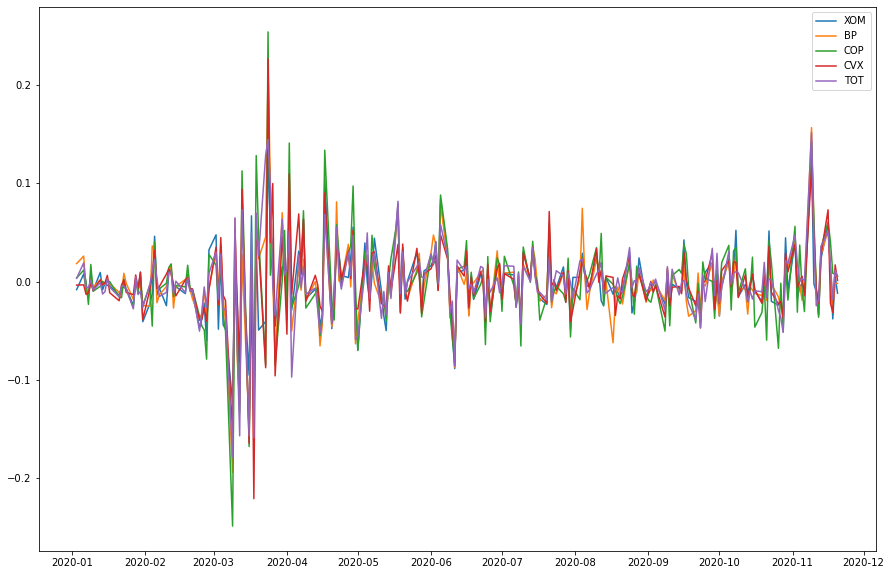

In [11]:
energy_covid_dr.plot(figsize=(15,10))

<AxesSubplot:>

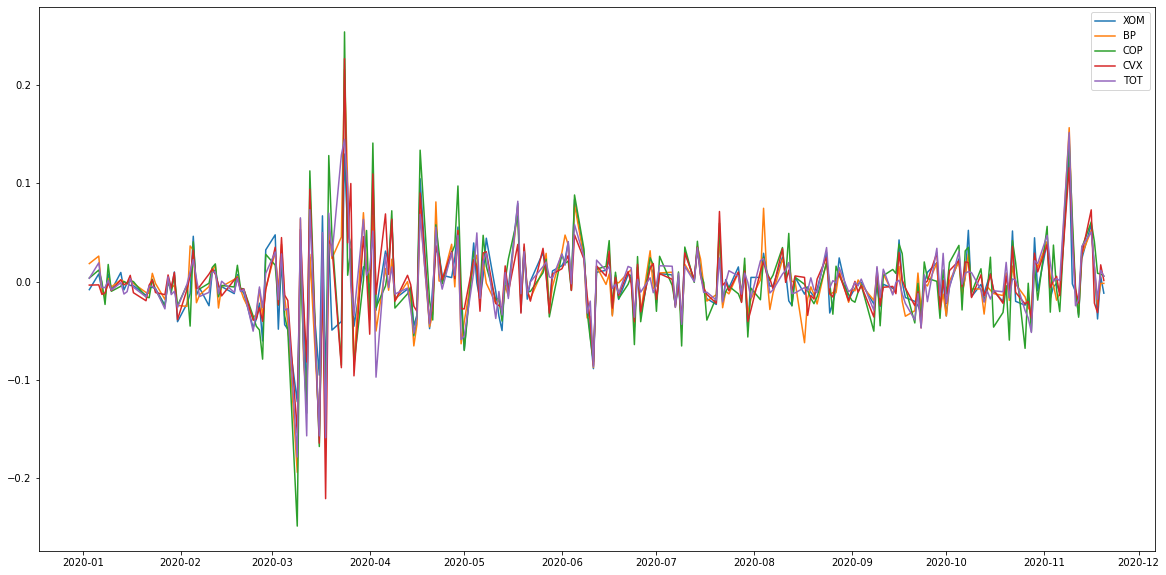

In [12]:
enerygy_returns2008.plot(figsize=(20,10))

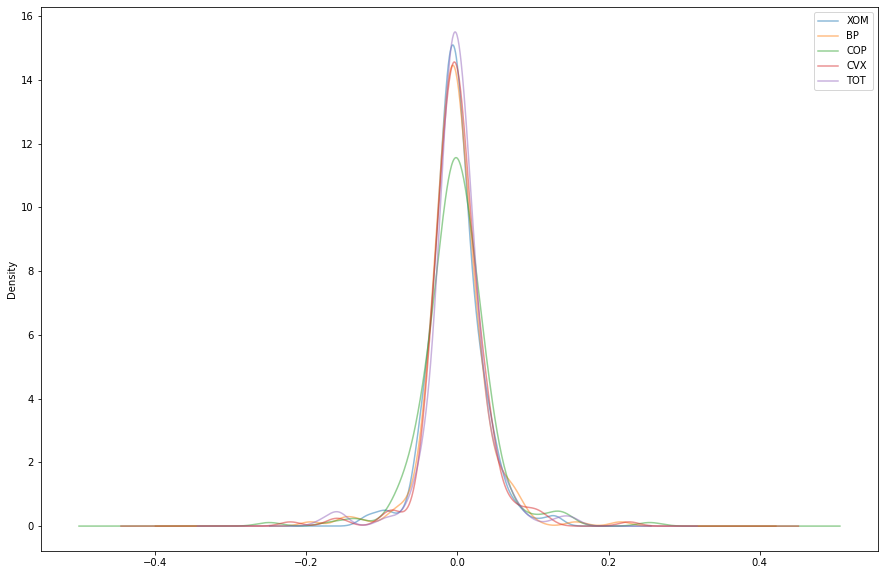

In [14]:
enerygy_returns2008.plot.density(alpha=.5,figsize=(15,10));